In [1]:
import numpy as np
import numpy.random as npr
from tqdm import tqdm
import matplotlib.pyplot as pt

In [2]:
def generate_one_episode(center, max_move):
    left = 0
    right = 2*center+1
    state = center
    episode = []
    while True:
        step = npr.choice(np.arange(max_move)+1)
        if npr.uniform()<=0.5:
            next_state = state+step
        else:
            next_state = state-step
        if next_state>=right:
            reward = 1
            episode.append((state, reward))
            break
        elif next_state<=left:
            reward = -1
            episode.append((state, reward))
            break
        else:
            reward = 0
            episode.append((state, reward))
            state = next_state
    return episode

In [3]:
def temporal_difference_prediction(w, n_episode, center, max_move, gamma=1, alpha=0.1):
    n_aggregation = len(w)

    all_state_features = []
    n_state_per_aggregation = 2*center//n_aggregation
    for i_state in range(2*center):
        state_feature = np.zeros(n_aggregation)
        state_feature[i_state//n_state_per_aggregation] = 1
        all_state_features.append(state_feature)
    all_state_features = np.array(all_state_features)

    for j in tqdm(range(n_episode)):
        episode = generate_one_episode(center, max_move)
        for i in range(len(episode)-1):
            
            w = w+alpha*all_state_features[episode[i][0]-1] \
                 *(episode[i][1]+gamma*np.dot(w, all_state_features[episode[i+1][0]-1])
                  -np.dot(w, all_state_features[episode[i][0]-1]))
            
        w = w+alpha*all_state_features[episode[-1][0]-1] \
                   *(episode[-1][1]-np.dot(w, all_state_features[episode[-1][0]-1]))
        
    return w, np.dot(all_state_features, w)

In [4]:
def gradient_monte_carlo_prediction(w, n_episode, center, max_move, gamma=1, alpha=0.1):
    n_aggregation = len(w)

    all_state_features = []
    n_state_per_aggregation = 2*center//n_aggregation
    for i_state in range(2*center):
        state_feature = np.zeros(n_aggregation)
        state_feature[i_state//n_state_per_aggregation] = 1
        all_state_features.append(state_feature)
    all_state_features = np.array(all_state_features)

    for j in tqdm(range(n_episode)):
        episode = generate_one_episode(center, max_move)
        n_step = len(episode)
        G = np.zeros(n_step)
        G[-1] = episode[-1][1]
        for i in range(n_step-2, -1, -1):
            G[i] = episode[i][1]+gamma*G[i+1]
        for i in range(n_step):
            s = episode[i][0]-1
            w = w+alpha*all_state_features[s]*(G[i]-np.dot(w, all_state_features[s]))

    return w, np.dot(all_state_features, w)

In [5]:
def theoretical_value(center, max_move):
    n_state = 2*center
    x = np.zeros((n_state, n_state))
    y = np.zeros(n_state)

    for i in range(n_state):
        x[i, i] = 2
        x[max(0, i-max_move):i, i] = -1/max_move
        x[i+1: i+1+max_move, i] = -1/max_move
        if i<max_move:
            y[i] = (i-max_move)/max_move
        elif (n_state-i-1)<max_move:
            y[i] = 1-(n_state-i-1)/max_move
        else:
            y[i] = 0

    return np.linalg.solve(x, y)

In [6]:
center = 500
max_move = 100

v_theory = theoretical_value(center, max_move)

100%|██████████| 100000/100000 [03:58<00:00, 419.08it/s]


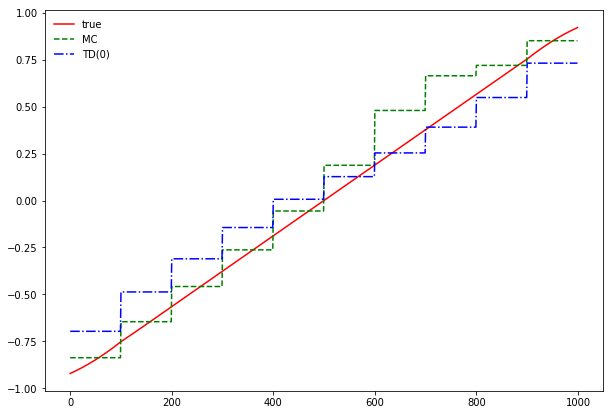

In [7]:
n_aggregation = 10
n_episode = 100000
gamma = 1
alpha = 1e-3

w_td = np.zeros(n_aggregation)
w_td, v_agg_td = temporal_difference_prediction(w_td,
                                                n_episode=n_episode,
                                                center=center,
                                                max_move=max_move,
                                                gamma=gamma,
                                                alpha=alpha)

w_mc = np.zeros(n_aggregation)
w_mc, v_agg_mc = gradient_monte_carlo_prediction(w_mc,
                                                 n_episode=n_episode,
                                                 center=center,
                                                 max_move=max_move,
                                                 gamma=gamma,
                                                 alpha=alpha)

pt.figure(1, figsize=(10, 7))
pt.plot(range(2*center), v_theory, 'r-', label=r'true')
pt.plot(range(2*center), v_agg_mc, 'g--', label=r'MC')
pt.plot(range(2*center), v_agg_td, 'b-.', label=r'TD(0)')
pt.legend(loc='best', frameon=False)
pt.show()

100%|██████████| 100000/100000 [04:02<00:00, 413.11it/s]


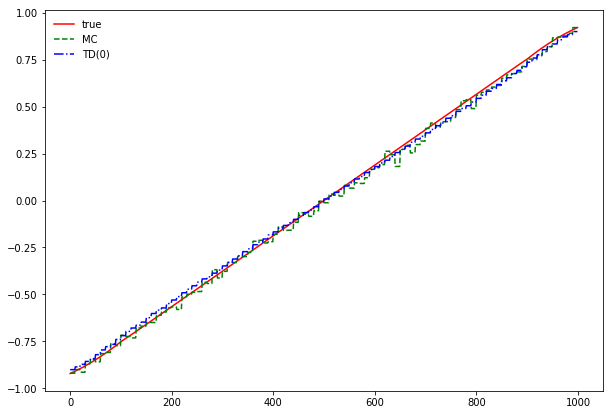

In [8]:
n_aggregation = 100
n_episode = 100000
gamma = 1
alpha = 1e-3

w_td = np.zeros(n_aggregation)
w_td, v_agg_td = temporal_difference_prediction(w_td,
                                                n_episode=n_episode,
                                                center=center,
                                                max_move=max_move,
                                                gamma=gamma,
                                                alpha=alpha)

w_mc = np.zeros(n_aggregation)
w_mc, v_agg_mc = gradient_monte_carlo_prediction(w_mc,
                                                 n_episode=n_episode,
                                                 center=center,
                                                 max_move=max_move,
                                                 gamma=gamma,
                                                 alpha=alpha)

pt.figure(1, figsize=(10, 7))
pt.plot(range(2*center), v_theory, 'r-', label=r'true')
pt.plot(range(2*center), v_agg_mc, 'g--', label=r'MC')
pt.plot(range(2*center), v_agg_td, 'b-.', label=r'TD(0)')
pt.legend(loc='best', frameon=False)
pt.show()